# Exploratory Data Analysis (EDA)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
print(iris.shape)

(150, 5)


In [11]:
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [12]:
#how many data points for each class are present?
#How many flowers for each species are present?

iris["variety"].value_counts()
#balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 500

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

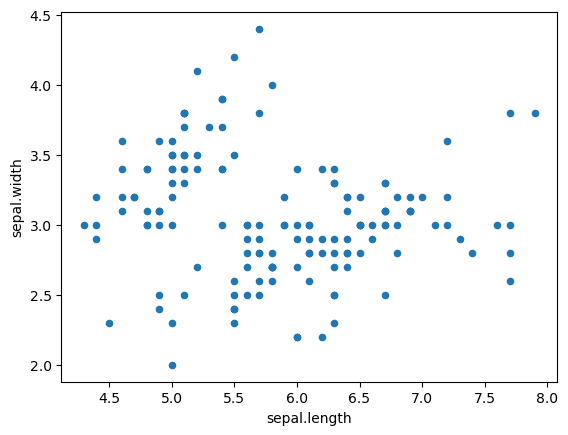

In [23]:
iris.plot(kind='scatter', x='sepal.length', y='sepal.width')
plt.show()

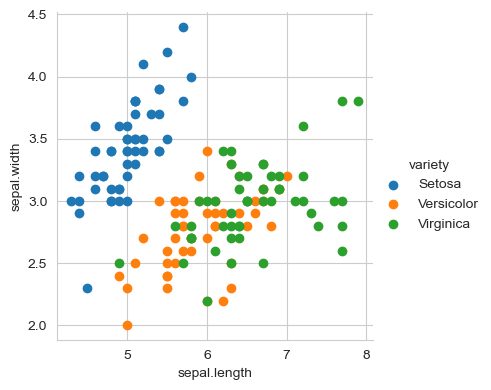

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="variety", height=4).map(plt.scatter,"sepal.length","sepal.width").add_legend();
plt.show();

# Pair Plot(EDA)

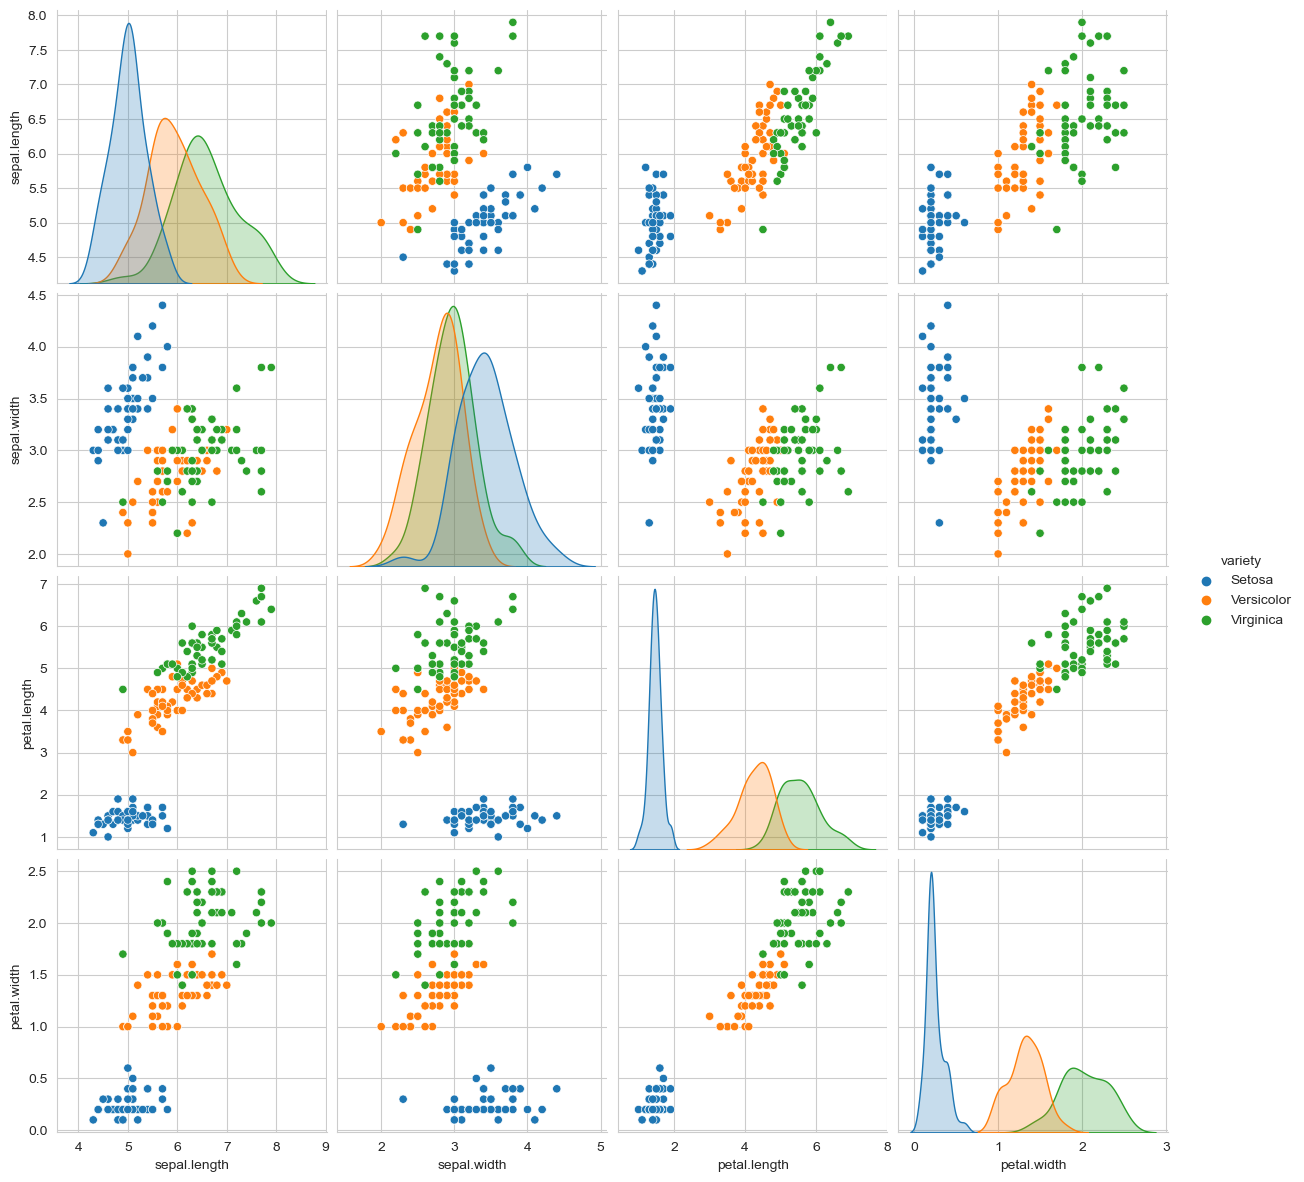

In [44]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="variety", height=3)
plt.show()

# 4c2 --> combination Total number of columns and total number of dimensions

# Limitation of Pair Plot(EDA)

Increase dimension ---> increase number of graphs --> difficult to check each and every graph

Overplotting: When you have a large number of data points, the points can overlap and make it difficult to see the underlying patterns in the data. You can use alpha to help reduce this effect

Computational complexity: Pair plots can be computationally intensive and slow to render, especially when you have a large number of variables in the dataset.

Lack of flexibility: Pair plots only show the relationship between pairs of variables, and do not allow you to easily explore higher-order relationships among the variables. This can make it difficult to uncover complex relationships in the data.

# Histogram(EDA)

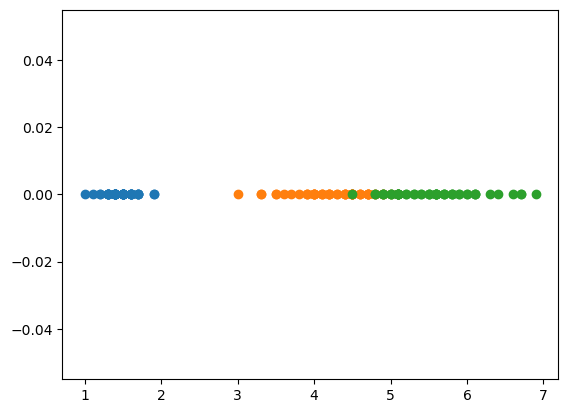

In [13]:
iris_setosa = iris.loc[iris["variety"]== "Setosa"] ## loc --> for using specific rows
iris_virginica = iris.loc[iris["variety"]== "Versicolor"]
iris_versicolor = iris.loc[iris["variety"]== "Virginica"]
plt.plot(iris_setosa["petal.length"], np.zeros_like(iris_setosa['petal.length']), 'o')
plt.plot(iris_virginica["petal.length"], np.zeros_like(iris_virginica['petal.length']), 'o')
plt.plot(iris_versicolor["petal.length"], np.zeros_like(iris_versicolor['petal.length']), 'o')

plt.show()

Histogram is a graphical representation of the distribution of numerical data. They divide the data into bins or intervals and display the frequency of occurrences within each bin using bars of varying heights.

You must use data that is continuous in nature, as histograms are best suited for continuous data because they can effectively represent the distribution of data points within continuous intervals.

Discrete numeric data, on the other hand, often contains a finite number of fixed values, which may result in a misleading representation if forced into a histogram.

It is a two-dimensional figure

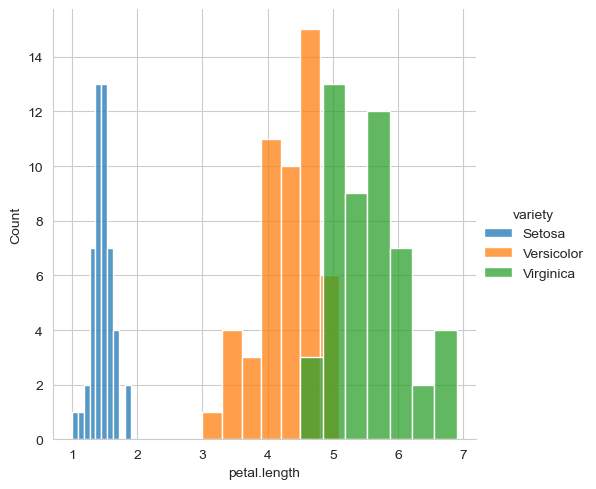

In [63]:
sns.FacetGrid(iris, hue="variety", height=5).map(sns.histplot,"petal.length").add_legend() #displot
plt.show()

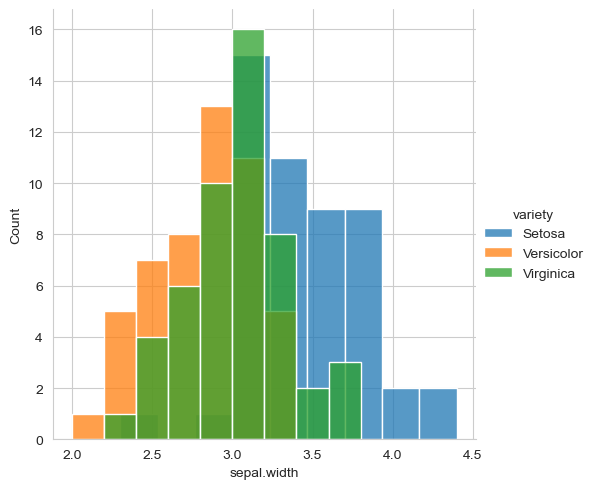

In [64]:
sns.FacetGrid(iris, hue="variety", height=5).map(sns.histplot,"sepal.width").add_legend()
plt.show()

What is Probability Density Function(PDF)?

Probability Density Function is used for calculating the probabilities for continuous random variables. When the cumulative distribution function (CDF) is differentiated we get the probability density function (PDF). Both functions are used to represent the probability distribution of a continuous random variable.

The probability density function is defined over a specific range. By differentiating CDF we get PDF and by integrating the probability density function we can get the cumulative density function.

## Cumulative Distribution Function(CDF)

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


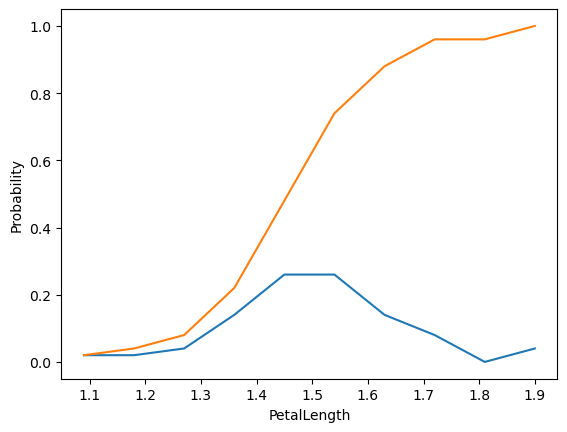

In [20]:
counts, bin_edges = np.histogram(iris_setosa['petal.length'], bins=10, density=True)
#Calculating probability bins=10 difference in output as we've 10
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

#compute cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("PetalLength")
plt.ylabel("Probability")
plt.show()


## Mean and Standard Deviation

In [22]:
print("Means:")
print(np.mean(iris_setosa["petal.length"]))

#Mean with an outlier
print(np.mean(np.append(iris_setosa['petal.length'],50)))
print(np.mean(iris_virginica["petal.length"]))
print(np.mean(iris_versicolor["petal.length"]))

print("\nStd-dev")
print(np.std(iris_setosa["petal.length"]))
print(np.std(iris_virginica["petal.length"]))
print(np.std(iris_versicolor["petal.length"]))

Means:
1.4620000000000002
2.4137254901960787
4.26
5.552

Std-dev
0.17191858538273286
0.4651881339845204
0.5463478745268441
